Feedback From assignment Team: 
Explore on model validation techniques like multicollinearity and residual analysis.
Submit MLR assignment on Toyota Corolla dataset.

For handling insignificant features,use feature selection technique where we remove insignificant features which are not helpful for the model.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_style('darkgrid')

In [2]:
DataCorolla = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
DataCorolla=DataCorolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
DataCorolla.info()
DataCorolla.isnull().sum()
DataCorolla.rename(columns={"Age_08_04":"Age","Quarterly_Tax":"QuarterlyTax"},inplace=True)

Allcol=DataCorolla.iloc[:,1:]
Allcoly=DataCorolla["Price"]
DataCorolla.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
DataCorolla.shape

In [ ]:
# Set the color palet

# Create the heatmap
sns.heatmap(DataCorolla.corr(),cmap='BuPu',annot=True)

# Add labels and title
plt.title("Correlation Matrix Heatmap")

plt.show()

For handling insignificant features,use feature selection technique where we remove insignificant features which are not helpful for the model.
From the above correlation matrix we can see that there is very little correlation between
cc,doors,gears and  target variable Price
Hence we can assume them as insignificant features but we will still validate their importance with other techniques.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df=DataCorolla


# Separate the features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Random Forest for Feature Importance
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importance_scores = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top K features based on importance score
k = 8  # Select top 3 features
selected_features = feature_importances['Feature'][:k]

# Display the selected features
print("Selected Features based on Tree-Based Feature Importance:")
print(selected_features)


Even with the Random forest we have clearly that our above feature importance is correct and we can now drop the CC,Gears and Doors from the above dataset and move ahead.

In [ ]:
# Drop the specified columns
X = X.drop(columns=["Gears", "cc", "Doors"])
X.info()

In [ ]:
# Check for Multicollinearity in the remaining DAtaset columns 


# Add a constant column for intercept in the regression model
# X = sm.add_constant(X)
def calculate_Vif(df):
        # Calculate VIF scores for each feature
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# Display the VIF scores
vif1=calculate_Vif(X)
print("VIF Scores:")
print(vif1)

Here the Highest VIF VALUE is shown by weight so we will remove the Weight and calculate the VIF again

In [ ]:
X = X.drop(columns=["Weight"])

In [ ]:
# Display the VIF scores AFTER The removal of Weight
vif2=calculate_Vif(X)
print("VIF Scores:")
print(vif2)
X = X.drop(columns=["Age"])

Here the next Highest VIF VALUE is shown by Age so we will remove the Age and calculate the VIF again

In [ ]:
# Display the VIF scores AFTER The removal of Weight
vif3=calculate_Vif(X)
print("VIF Scores:")
print(vif3)
X = X.drop(columns=["QuarterlyTax"])

In [ ]:
# Display the VIF scores AFTER The removal of Weight
vif4=calculate_Vif(X)
print("VIF Scores:")
print(vif4)

X

Here the next Highest VIF VALUE is shown by QuarterlyTax so we will remove the QuarterlyTax  and calculate the VIF again

In [ ]:
# Join Xand y 
# Join X and y
data_combined = pd.concat([X, y], axis=1)
data_combined.corr()
sns.scatterplot(x=data_combined["KM"],y=data_combined["Price"])
plt.show()
sns.scatterplot(x=data_combined["HP"],y=data_combined["Price"])
plt.show()

In [ ]:
sns.boxplot(x=data_combined["KM"])

# So now we have got the most important features to create the Multilinear model for predicting the Price in the Toyota Corolla dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

def getMSE_R2(X, y):
    # Scale the features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Build the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error of the model
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the R2 score
    r2 = r2_score(y_test, y_pred)
   
    return mse, r2


In [ ]:
# Metrics after removing the insignificant columns and columns with multicollinearity
print("Metrics for model only KM and HP independent Columns:")
MSE1,R21=getMSE_R2(X,y)
print("Mean Squared Error:", MSE1)
print("R2 score:", R21)

print("====================================================")
# Metrics With All the given Values
print("Metrics with ALL colums")
MSE2,R22=getMSE_R2(Allcol,Allcoly)
print("Mean Squared Error:", MSE2)
print("R2 score:", R22)


In [ ]:
# Model with only 1 column KM 
x = DataCorolla.iloc[:, 2]
Y = DataCorolla["Price"]
print("Metrics with only KM independent Column:")
MSE3, R23 = getMSE_R2(x.values.reshape(-1, 1), Y)
print("Mean Squared Error:", MSE3)
print("R2 score:", R23)

Here as we can see When we removed Irrelaevant columns and the Multicollinearity we got 
Mean Squared Error: 8522354.011692544
R2 score: 0.3612764084387523
Here both the Error as well as R2score is very bad
and when we used all the columns we got :
we got R2 around 85% 
but the error term is quite high 8522354.011692544
With the single column it the model that we got was even worse 
Metrics with only KM independent Column:
Mean Squared Error: 8930006.552875984
R2 score: 0.3307241344007902

Overall MLR is not a suitable model for this Toyota dataset.

# model validation techniques like multicollinearity and residual analysis

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create the design matrix X with all independent variables
X = DataCorolla.drop("Price", axis=1)

# Create scatterplots of each independent variable against the others

# Specify the target variable
target_variable = 'Price'

# Iterate over each independent variable and create the partial regression plot
for feature in X.columns:
    if feature != target_variable:
        print(target_variable)
        print(feature)
        print(X.columns.drop(feature))
        sm.graphics.plot_partregress(endog=target_variable, exog_i=feature, exog_others=X.drop(columns=[feature]),data=DataCorolla, obs_labels=False)
        
        plt.title(f'Partial Regression Plot: {feature} vs {target_variable}')
        plt.show()



The plot_partregress_grid function in the statsmodels library is used to create a grid of partial regression plots for multiple predictor variables. Each plot shows the relationship between the response variable and a specific predictor variable, while controlling for the effects of all other predictor variables included in the model.

Interpreting the partial regression plot grid involves examining each individual plot and considering the following:

Slope of the line of best fit: A positive slope indicates a positive relationship between the response variable and predictor variable, while a negative slope indicates a negative relationship. The steeper the slope, the stronger the relationship.

Pattern of data points: Patterns such as curves or clusters could indicate non-linear relationships or influential data points.

Outliers: Any data points that are far away from the main cluster could be influential and have a large impact on the model.

# NORMALITY TEST

In [3]:
import statsmodels.formula.api as smf


    # Split the data into training and testing sets

    # Build the Linear Regression model
multialgo=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=DataCorolla).fit()

multialgo.summary()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 25 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:22:10   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age           -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM              -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP              31.6809      2.818     11.241      0.000      26.152      37.209
cc              -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors           -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears          594.3199    197.055      3.016      0.003     207.771     980.869
QuarterlyTax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight          16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
multialgo.pvalues

Intercept        8.241949e-05
Age             3.354724e-288
KM               7.538439e-57
HP               3.757218e-28
cc               1.790902e-01
Doors            9.677716e-01
Gears            2.606549e-03
QuarterlyTax     2.619148e-03
Weight           2.048576e-52
dtype: float64

We can say that as per the pvalues all the pvalues are =0.0000 except cc = 0.17 and dOOR =0.9

# NORMALITY TEST¶

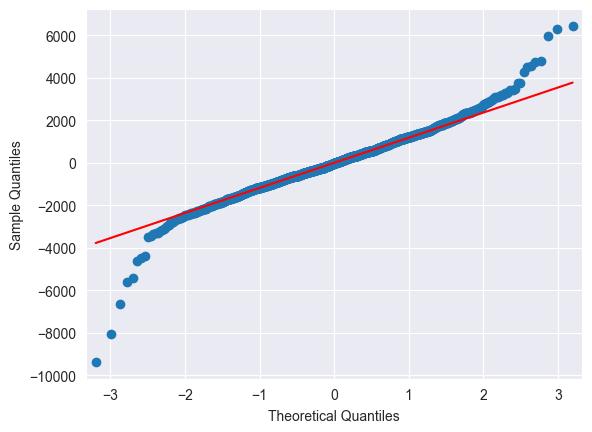

In [5]:

multialgo.resid
#Q-Q plot
sm.qqplot(multialgo.resid, line='q');

In [6]:
#get index for higher and lower  residuals
np.where((multialgo.resid>3000)|(multialgo.resid<-3000))

(array([   0,   16,   52,   62,   74,   80,   91,  109,  110,  111,  115,
         125,  141,  147,  154,  161,  171,  179,  189,  191,  192,  221,
         254,  292,  321,  370,  393,  402,  463,  523,  557,  601,  654,
         796,  960, 1054, 1058, 1079, 1382, 1402, 1435], dtype=int64),)

# Residual plot of Homoscedasticity
Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

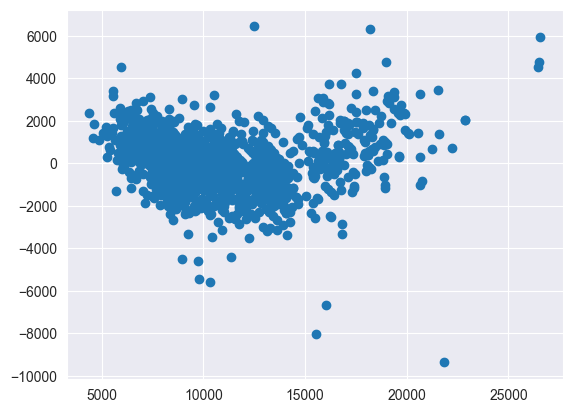

In [7]:
plt.scatter(multialgo.fittedvalues,multialgo.resid)

Here we see that there is a pattern in  area between 5000 to 20000 that means the errors are not normally distributed  around the mean .

# MODEL DELETION Diagnostics

Cook's Distance Detecting influencers and outliers

In [8]:
inf=multialgo.get_influence()
c,p = inf.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

<StemContainer object of 3 artists>

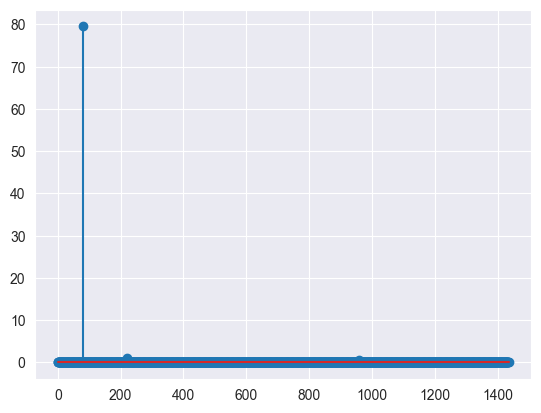

In [9]:
# Cook's distance plot
plt.stem(c)

In [10]:
np.argmax(c),np.max(c)

(80, 79.52010624139086)

Here we can se there are lot of influential datapoints which need to be deleted.


In [13]:
DataCorolla.iloc[[80]]

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


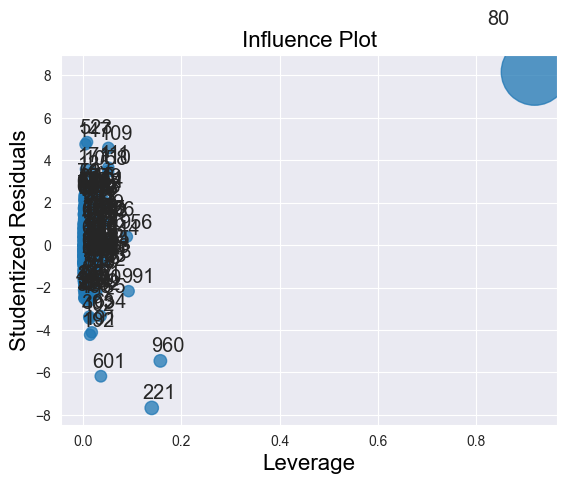

In [14]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(multialgo);

In [16]:
#Calculate cutoff
k = len(DataCorolla.columns)
n = len(DataCorolla)

levarge_cutoff = 3*(k+1)/n
levarge_cutoff

0.020891364902506964

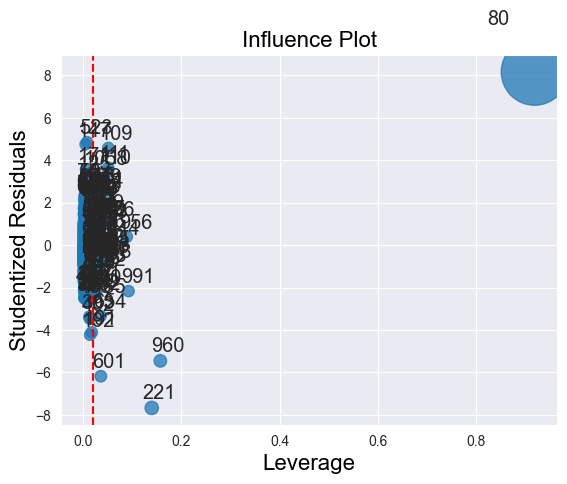

In [17]:
influence_plot(multialgo)
plt.axvline(levarge_cutoff,color = 'red',linestyle = '--')

In [18]:
DataCorolla.drop(index=[80],inplace=True)

In [19]:
DataCorolla.reset_index(inplace=True)
DataCorolla.drop(columns=['index'], inplace=True)

<StemContainer object of 3 artists>

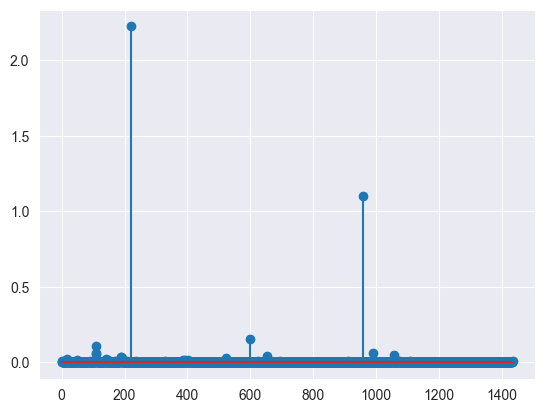

In [20]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=DataCorolla).fit()
inf = model.get_influence()
c,p = inf.cooks_distance
plt.stem(c)

In [21]:
np.argmax(c),np.max(c)

(220, 2.2244611713010993)

<StemContainer object of 3 artists>

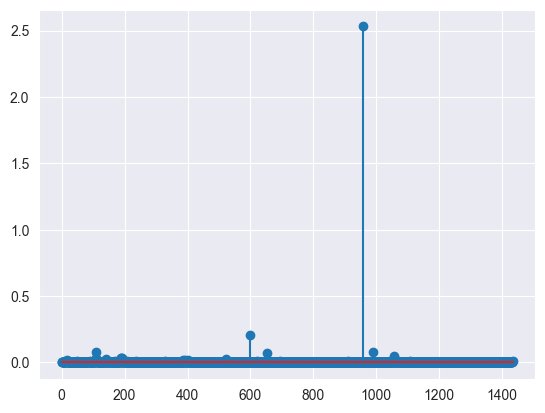

In [22]:
DataCorolla.drop(index=[220],inplace=True)
DataCorolla.reset_index(inplace=True)
DataCorolla.drop(columns=['index'], inplace=True)
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=DataCorolla).fit()
inf = model.get_influence()
c,p = inf.cooks_distance
plt.stem(c)

In [23]:
np.argmax(c),np.max(c)


(958, 2.531256693023263)

<StemContainer object of 3 artists>

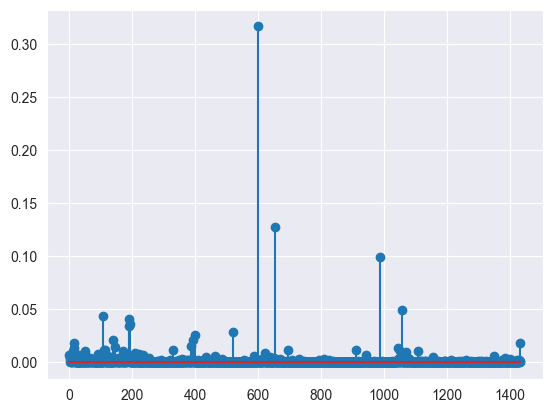

In [24]:
DataCorolla.drop(index=[958],inplace=True)
DataCorolla.reset_index(inplace=True)
DataCorolla.drop(columns=['index'], inplace=True)
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=DataCorolla).fit()
inf = model.get_influence()
c,p = inf.cooks_distance
plt.stem(c)

In [27]:
#Final Model
# Since the value is <1 , we can stop the diagnostic process and finalize the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 25 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:26:44   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age           -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM              -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP              36.6084      2.745     13.334      0.000      31.223      41.994
cc              -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors         -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears          464.9839    180.976      2.569      0.010     109.975     819.993
QuarterlyTax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight          30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""